# Thực hành 


In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd
%matplotlib inline
#plt.gray()


## Phát sinh dữ liệu

## KMeans trên tập dữ liệu đã phát sinh

In [46]:
X,Y = make_blobs(n_samples=150, n_features=2, centers=2)

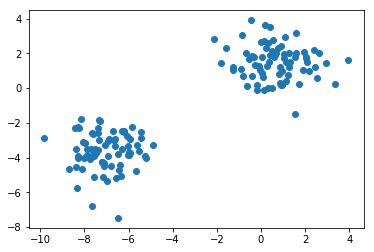

In [47]:
plt.scatter(X[:,0],X[:,1])

plt.show()

In [48]:
print(Y)

[0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1
 0 1]


In [49]:
model = KMeans(n_clusters=2)
labels1 = model.fit_predict(X)

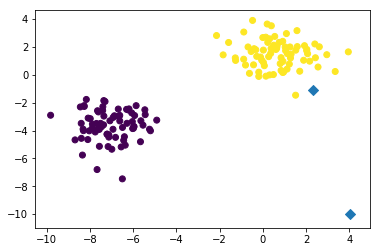

In [50]:
plt.scatter(X[:,0],X[:,1], c=labels1 ,alpha=1)

center_points=model.cluster_centers_
center_points_x = center_points[:,0]
center_points_y = center_points[:,1]

plt.scatter(ctp_x,ctp_y,marker='D',s=50)

plt.show()

# Thuc hanh bai tap 2

In [21]:
# Load dataset
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


In [6]:
model2 = KMeans(n_clusters=10)
labels = model2.fit_predict(digits.data)


In [7]:
df=pd.DataFrame({'labels':labels,'Truth labels':digits.target})
ct = pd.crosstab(df['labels'],df['Truth labels'])
print(ct)

Truth labels    0   1    2    3    4    5    6   7    8    9
labels                                                      
0               0   1    0    2    0  140    0   0    5    4
1               0   2    0    0    0    2  177   0    2    0
2             177   0    1    0    0    0    1   0    0    0
3               0   0   12  165    0   39    0   0   47  145
4               0   0    0    2    7    0    0  93    0    1
5               0  55    2    0    6    0    1   0    6   19
6               0   0    3    7    3    0    0  86    7   10
7               1   0    0    0  163    1    0   0    0    0
8               0  99    8    7    2    0    2   0  103    1
9               0  25  151    0    0    0    0   0    4    0


lables_predict: 0
 True:  5


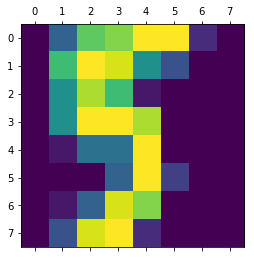

In [8]:
n=15
plt.matshow(digits.images[n])
print('lables_predict:',labels[n])
print(' True: ', digits.target[n])

In [9]:
# Spectral_clustering

from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
import numpy as np
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity

# dist = DistanceMetric.get_metric('euclidean')
# graph=dist.pairwise(digits.data) 

graph = cosine_similarity(digits.data)
label_spectral = spectral_clustering(graph, n_clusters=10)


In [10]:
df1=pd.DataFrame({'labels':label_spectral,'Truth labels':digits.target})
ct2=pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0   0    1  146    0    0    0    0    6    2
1               0   0    2    2   11    0    0  153    3    2
2             177   0    1    0    1    1    0    0    0    3
3               0  36  115    4    0    0    0    0    1    0
4               0   2    0    1    0    2  172    0   13    0
5               1   0    0    0  163    2    0    0    0    0
6               0   0    0   16    0   20    2    0    7  133
7               0  58    5    5    1    0    0   16   40   36
8               0   0    0    4    0  157    0    0    3    3
9               0  86   53    5    5    0    7   10  101    1


lables_predict: 2
 True:  0


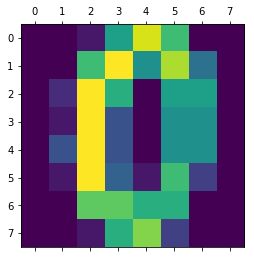

In [11]:
n=10
plt.matshow(digits.images[n])
print('lables_predict:',label_spectral[n])
print(' True: ', digits.target[n])


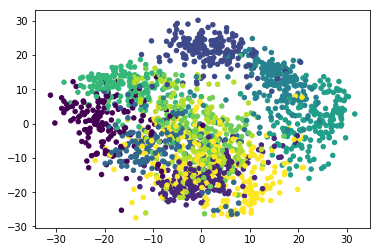

In [12]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
digitsData_to_2dimention = pca.fit_transform(digits.data)

plt.scatter(digitsData_to_2dimention[:,0], digitsData_to_2dimention[:,1],  c= label_spectral, s=20)
plt.show()

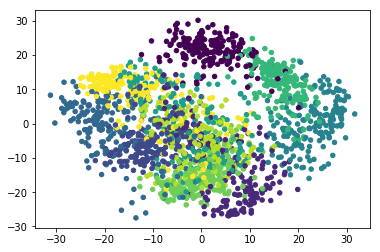

In [71]:
plt.scatter(digitsData_to_2dimention[:,0], digitsData_to_2dimention[:,1],  c= digits.target, s=20)
plt.show()

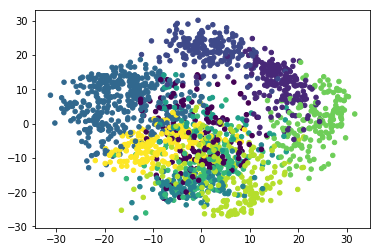

In [13]:
plt.scatter(digitsData_to_2dimention[:,0],digitsData_to_2dimention[:,1], c=labels,s=20)
plt.show()

In [64]:
eps = 0.0595
min_samples = 10

from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=eps, min_samples =min_samples,metric='cosine')

labels_dbscan = dbscan.fit_predict(digits.data)
df_dbscan = pd.DataFrame({'labels':labels_dbscan,'Truth labels':digits.target})
ct_dbscan=pd.crosstab(df_dbscan['labels'],df_dbscan['Truth labels'])
print(ct_dbscan)

Truth labels    0    1    2    3    4   5    6    7   8    9
labels                                                      
-1              7   13   41   49   35  68    5   52  81   78
 0            171    0    0    0    0   0    0    0   0    0
 1              0  143    0    0    0   0    1    0  93    1
 2              0    0    0    0    0   0  175    0   0    0
 3              0    0    0  134    0   1    0    0   0  101
 4              0    0    0    0  146   0    0    0   0    0
 5              0    0  136    0    0   0    0    0   0    0
 6              0    0    0    0    0  65    0    0   0    0
 7              0    0    0    0    0   0    0  127   0    0
 8              0    0    0    0    0  48    0    0   0    0
 9              0   26    0    0    0   0    0    0   0    0


lables_predict: 4
 True:  4


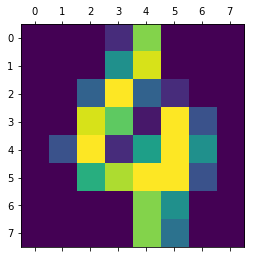

In [69]:
n=
plt.matshow(digits.images[n])
print('lables_predict:',labels_dbscan[n])
print(' True: ', digits.target[n])

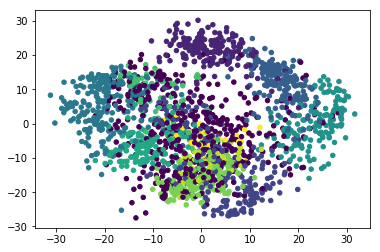

In [70]:
plt.scatter(digitsData_to_2dimention[:,0],digitsData_to_2dimention[:,1], c=labels_dbscan,s=20)
plt.show()